In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
def show_digit(X_train, y_train):
    random = np.random.randint(60, size=64)
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(5, 5))

    for i, ax in enumerate(axes.flatten()):
        image = X_train[random[i]].reshape(28, 28)
        label = y_train[random[i]]
        ax.imshow(image, cmap='gray')
        ax.set_title(label)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


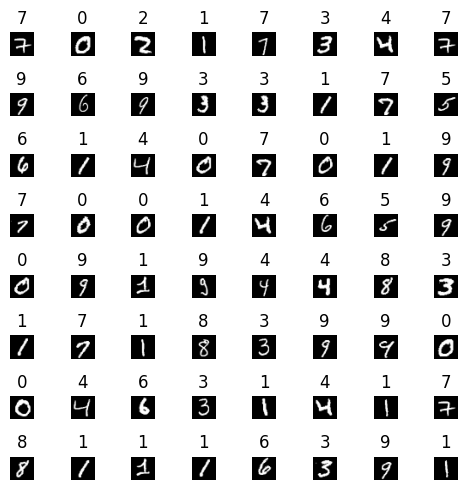

In [ ]:
show_digit(X_train,y_train)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                19625     
                                                                 
 dense_13 (Dense)            (None, 15)                390       
                                                                 
 dense_14 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'],  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))


Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 2.2968 - accuracy: 0.4290 - val_loss: 1.1032 - val_accuracy: 0.6405
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8909 - accuracy: 0.6960 - val_loss: 0.7599 - val_accuracy: 0.7510
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6758 - accuracy: 0.7884 - val_loss: 0.6172 - val_accuracy: 0.8181
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5783 - accuracy: 0.8257 - val_loss: 0.5605 - val_accuracy: 0.8283
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5468 - accuracy: 0.8374 - val_loss: 0.5467 - val_accuracy: 0.8400
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5246 - accuracy: 0.8436 - val_loss: 0.5276 - val_accuracy: 0.8435
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5111 - accuracy: 0.8491 - val_loss: 0.5023 - val_accuracy:

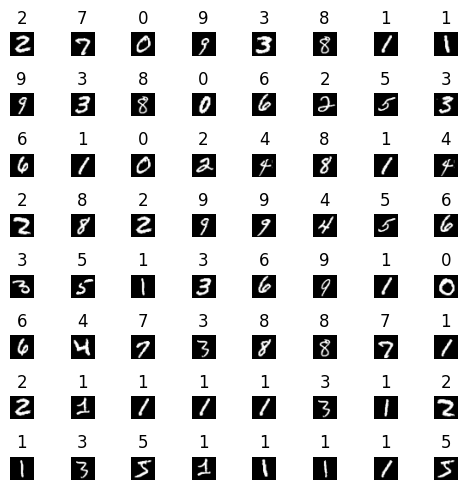

In [ ]:
show_digit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_pred(X_test, y_test, predictions):
    random = np.random.randint(0, len(X_test), size=64)
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(5, 5))

    for i, ax in enumerate(axes.flatten()):
        image = X_test[random[i]].reshape(28, 28)
        label = y_test[random[i]]


        if label ==  predictions[random[i]]:
            ax.set_title(label, color="green")
        else:
            ax.set_title( predictions[random[i]], color="red")

        ax.imshow(image, cmap='gray')
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


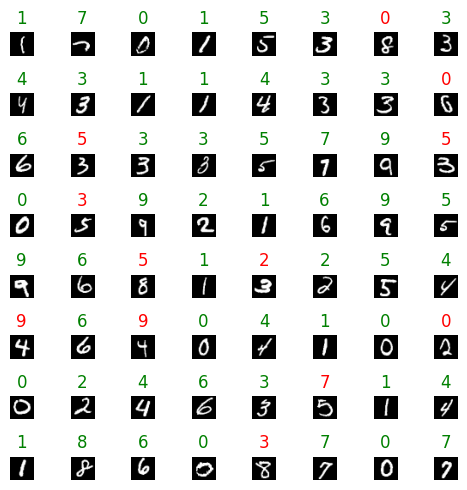

In [ ]:
show_pred(X_test, y_test, predictions)

In [ ]:
# count errors
error = 0
for i in range(5000):
  if(y_train[i] == predictions[i]):
    error += 1

print(f"Number of errors: {error}")

Number of errors: 516
